In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
data = pd.read_csv('ArticlesApril2017.csv')

In [3]:
data.head(3)

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58def1347c459f24986d7c80,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,One of the largest photo displays in Times his...,The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
1,NaN,58def3237c459f24986d7c84,823,By GAIL COLLINS,article,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",3,OpEd,23,2017-04-01 00:23:58,Unknown,Meet the gang from under the bus.,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/31/opinion/and...
2,NaN,58def9f57c459f24986d7c90,575,By THE EDITORIAL BOARD,article,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",3,Editorial,22,2017-04-01 00:53:06,Unknown,A court ruling annulling the legislature’s aut...,The New York Times,Editorial,https://www.nytimes.com/2017/03/31/opinion/ven...


In [4]:
data.isnull().sum()

abstract            864
articleID             0
articleWordCount      0
byline                0
documentType          0
headline              0
keywords              0
multimedia            0
newDesk               0
printPage             0
pubDate               0
sectionName           0
snippet               0
source                0
typeOfMaterial        0
webURL                0
dtype: int64

In [5]:
data.describe()

,articleWordCount,multimedia,printPage
count,886.000000,886.000000,886.000000
mean,1093.505643,3.857788,7.635440
std,799.095918,7.891072,10.809874
min,57.000000,0.000000,0.000000
25%,708.500000,3.000000,0.000000
50%,982.500000,3.000000,2.000000
75%,1291.750000,3.000000,13.000000
max,7832.000000,68.000000,74.000000


C:\Users\atuls\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


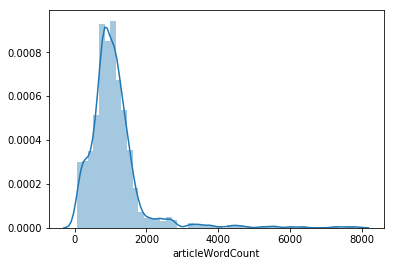

In [6]:
sns.distplot(data['articleWordCount'])

In [7]:
text=data[['headline', 'keywords', 'snippet']]
text.head(5)

,headline,keywords,snippet
0,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",One of the largest photo displays in Times his...
1,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",Meet the gang from under the bus.
2,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",A court ruling annulling the legislature’s aut...
3,Stain Permeates Basketball Blue Blood,"['Basketball (College)', 'University of North ...","For two decades, until 2013, North Carolina en..."
4,Taking Things for Granted,['Crossword Puzzles'],In which Howard Barkin and Will Shortz teach u...


In [8]:
combined = []

for i in text.index:
    combined.append((text['headline'][i]+" "+text['snippet'][i]))
    
combined[:3]

['Finding an Expansive View  of a Forgotten People in Niger One of the largest photo displays in Times history, of people who have fled Boko Haram, required an effort just as immense.',
 'And Now,  the Dreaded Trump Curse Meet the gang from under the bus.',
 'Venezuela’s Descent Into Dictatorship A court ruling annulling the legislature’s authority represents a dangerous turning point for Venezuela.']

In [9]:
text['combined'] = combined
text.head(3)

C:\Users\atuls\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,headline,keywords,snippet,combined
0,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",One of the largest photo displays in Times his...,Finding an Expansive View of a Forgotten Peop...
1,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",Meet the gang from under the bus.,"And Now, the Dreaded Trump Curse Meet the gan..."
2,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",A court ruling annulling the legislature’s aut...,Venezuela’s Descent Into Dictatorship A court ...


## Basic Preprocessing Function

In [10]:
def preprocess(text):
    text = text.lower()
    regex = re.compile(r'[%s%s]' % (string.punctuation, string.digits))
    text = regex.sub(' ', text) 
    regex = re.compile(r'[\s+]')
    text = regex.sub(' ', text)
    text = ' '.join([w for w in text.split()]) # removes extra spaces introduced by replacing punctuation with a space
    return text

In [11]:
txt_pp = [preprocess(c) for c in text['combined']]
txt_pp[:5]

['finding an expansive view of a forgotten people in niger one of the largest photo displays in times history of people who have fled boko haram required an effort just as immense',
 'and now the dreaded trump curse meet the gang from under the bus',
 'venezuela’s descent into dictatorship a court ruling annulling the legislature’s authority represents a dangerous turning point for venezuela',
 'stain permeates basketball blue blood for two decades until north carolina engaged in academic improprieties that benefited its student athletes the repercussions are still being felt',
 'taking things for granted in which howard barkin and will shortz teach us a lesson']

In [12]:
from operator import itemgetter
from nltk import FreqDist

def freq_words_count(x):
    '''Takes a list of strings and returns a list of (word, frequency) tuples'''
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    dct_words={}
    
    fdist = FreqDist(all_words)
    for k,v in fdist.items():
        dct_words[k]=v
    dct_words=sorted(dct_words.items(), key=itemgetter(1), reverse=True)
    return dct_words

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def freq_words(x, terms = 30):
    '''Takes a list of strings and optionally the desired number of most frequent terms.  
    Plots a bar graph of the specified number of most frequent terms'''
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
 
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 30 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

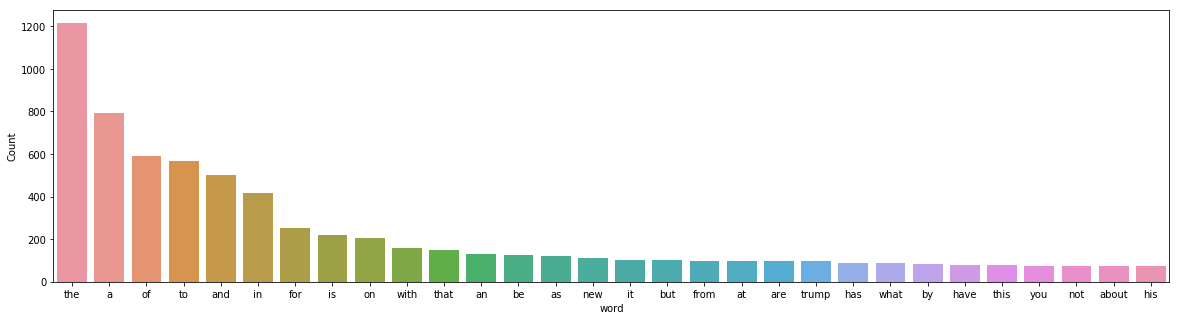

In [13]:
freq_words(txt_pp)

In [14]:
print(freq_words_count(txt_pp)[:30])

[('the', 1216), ('a', 791), ('of', 592), ('to', 567), ('and', 502), ('in', 417), ('for', 255), ('is', 222), ('on', 208), ('with', 160), ('that', 151), ('an', 130), ('be', 126), ('as', 119), ('new', 114), ('it', 104), ('but', 102), ('from', 100), ('at', 99), ('are', 97), ('trump', 96), ('has', 89), ('what', 87), ('by', 83), ('have', 78), ('this', 78), ('you', 76), ('not', 74), ('about', 73), ('his', 72)]


In [15]:
stopwords =['the', 'a', 'of', 'to', 'and', 'in', 'for', 'is', 'on', 'with', 'that', 'an', 'be', 'as', 'it', 'from', 'at',
           'are', 'has', 'by', 'have', 'this', 'his', 'will', 'its', 'they', 'was', 'or', '-', 's', '"', 'up', 'do', 'i',
           'we', 'us', 'so', 'if', 'my', 'u', "it's", 'had', "'"]

In [18]:
txt_pp_swr = []

for i in txt_pp:
    txt_pp_swr.append([word for word in i.split() if word not in stopwords])
    
print(txt_pp_swr[:3])

[['finding', 'expansive', 'view', 'forgotten', 'people', 'niger', 'one', 'largest', 'photo', 'displays', 'times', 'history', 'people', 'who', 'fled', 'boko', 'haram', 'required', 'effort', 'just', 'immense'], ['now', 'dreaded', 'trump', 'curse', 'meet', 'gang', 'under', 'bus'], ['venezuela’s', 'descent', 'into', 'dictatorship', 'court', 'ruling', 'annulling', 'legislature’s', 'authority', 'represents', 'dangerous', 'turning', 'point', 'venezuela']]


In [28]:
txt_swr=[' '.join(w for w in comm) for comm in txt_pp_swr]
txt_swr[:2]

['finding expansive view forgotten people niger one largest photo displays times history people who fled boko haram required effort just immense',
 'now dreaded trump curse meet gang under bus']

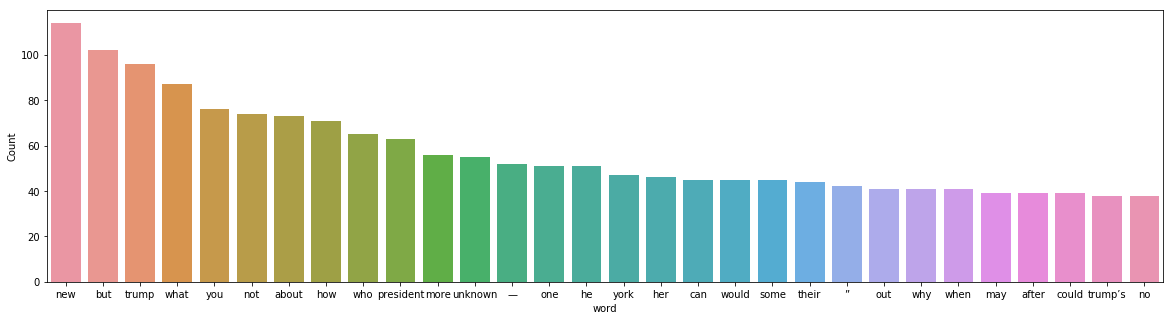

In [29]:
freq_words(txt_swr)

## POS Tagging and Lemmatization 

In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lm = WordNetLemmatizer()

In [31]:
to_nltk_tags={"NOUN":'n', "VERB":'v', "ADJ":'a', 'DET':'r',"CCONJ":'r', 'ADV':'r', 'ADP':'r', 'PRON':'n',
            'PART':'r', 'INTJ':'r', 'NUM':'a', 'PROPN':'n', 'X':'r', "PUNCT":'r','SYM':'r'}

In [32]:
POS_sp = []
for i in range(len(txt_swr)):
    tagged_tokens=[]
    doc = nlp(txt_swr[i])
    for token in doc:
        if token.pos_ in to_nltk_tags:
            tagged_tokens.append((token.text,to_nltk_tags[token.pos_]))
        else: tagged_tokens.append((token.text,'n'))
    POS_sp.append(tagged_tokens)

print(POS_sp[:3])

[[('finding', 'v'), ('expansive', 'a'), ('view', 'n'), ('forgotten', 'v'), ('people', 'n'), ('niger', 'a'), ('one', 'a'), ('largest', 'a'), ('photo', 'n'), ('displays', 'n'), ('times', 'r'), ('history', 'n'), ('people', 'n'), ('who', 'n'), ('fled', 'v'), ('boko', 'n'), ('haram', 'n'), ('required', 'v'), ('effort', 'n'), ('just', 'r'), ('immense', 'a')], [('now', 'r'), ('dreaded', 'v'), ('trump', 'n'), ('curse', 'n'), ('meet', 'n'), ('gang', 'n'), ('under', 'r'), ('bus', 'n')], [('venezuela', 'n'), ('’s', 'r'), ('descent', 'n'), ('into', 'r'), ('dictatorship', 'n'), ('court', 'n'), ('ruling', 'n'), ('annulling', 'v'), ('legislature', 'n'), ('’s', 'r'), ('authority', 'n'), ('represents', 'v'), ('dangerous', 'a'), ('turning', 'n'), ('point', 'n'), ('venezuela', 'n')]]


In [37]:
# Lemmatize
txt=[]
for i in range(len(POS_sp)):
    txt.append([lm.lemmatize(POS_sp[i][w][0], pos=POS_sp[i][w][1]) for w in range(len(POS_sp[i]))])
print(txt[:3])

[['find', 'expansive', 'view', 'forget', 'people', 'niger', 'one', 'large', 'photo', 'display', 'times', 'history', 'people', 'who', 'flee', 'boko', 'haram', 'require', 'effort', 'just', 'immense'], ['now', 'dread', 'trump', 'curse', 'meet', 'gang', 'under', 'bus'], ['venezuela', '’s', 'descent', 'into', 'dictatorship', 'court', 'ruling', 'annul', 'legislature', '’s', 'authority', 'represent', 'dangerous', 'turning', 'point', 'venezuela']]


In [43]:
# Remove Short Words & get cleaned text as a list of sentences:
cl_txt = [(' '.join(word for word in comm if len(word)>2)) for comm in txt]
cl_txt[:3]

['find expansive view forget people niger one large photo display times history people who flee boko haram require effort just immense',
 'now dread trump curse meet gang under bus',
 'venezuela descent into dictatorship court ruling annul legislature authority represent dangerous turning point venezuela']

[('trump', 134), ('new', 115), ('but', 103), ('what', 100), ('you', 84)]


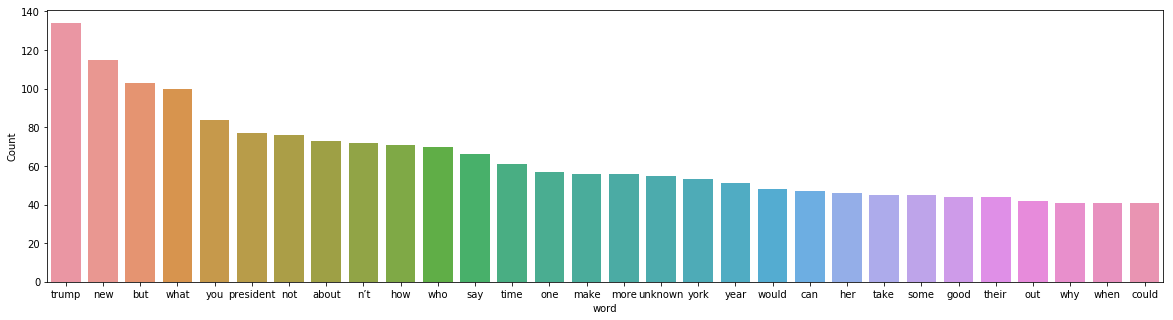

In [46]:
print(freq_words_count(cl_txt)[:5])
freq_words(cl_txt)